# EDA

## User_info and User csvs

In [2]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt

df_user = pd.read_csv('data_collection/user.csv')

In [3]:
# Display the DataFrame
df_user.head()

,name,realname,country,loved_tracks
0,RJ,Richard Jones,United Kingdom,"[{'track_name': 'Fire', 'artist_name': 'The Bl..."
1,franhale,Fran,United Kingdom,"[{'track_name': 'Mayhem', 'artist_name': 'Imel..."
2,eartle,Michael Coffey,United Kingdom,"[{'track_name': 'Tester', 'artist_name': 'Hind..."
3,massdosage,Mass Dosage,United Kingdom,"[{'track_name': 'Rock Lobster', 'artist_name':..."
4,Knapster01,Matt Knapman,United Kingdom,"[{'track_name': 'Asimov', 'artist_name': '65da..."


In [4]:
# Display the DataFrame
df_user.head()

,name,realname,country,loved_tracks
0,RJ,Richard Jones,United Kingdom,"[{'track_name': 'Fire', 'artist_name': 'The Bl..."
1,franhale,Fran,United Kingdom,"[{'track_name': 'Mayhem', 'artist_name': 'Imel..."
2,eartle,Michael Coffey,United Kingdom,"[{'track_name': 'Tester', 'artist_name': 'Hind..."
3,massdosage,Mass Dosage,United Kingdom,"[{'track_name': 'Rock Lobster', 'artist_name':..."
4,Knapster01,Matt Knapman,United Kingdom,"[{'track_name': 'Asimov', 'artist_name': '65da..."


In [5]:
import requests
from datetime import datetime

# Assign a unique user ID
df_user['user_id'] = range(1, len(df_user) + 1)

# Ensure that each user's loved_tracks is a list
df_user['loved_tracks'] = df_user['loved_tracks'].apply(lambda x: eval(str(x)))

# Expand the 'loved_tracks' column
expanded_tracks = df_user.explode('loved_tracks')

# Normalize the 'loved_tracks' column
expanded_tracks = pd.concat([expanded_tracks.drop(['loved_tracks'], axis=1), expanded_tracks['loved_tracks'].apply(pd.Series)], axis=1)

# Extract year from 'date_time'
expanded_tracks['year'] = expanded_tracks['date_time'].apply(lambda x: datetime.utcfromtimestamp(int(x['uts'])).year)

# Drop the 'date_time' column
expanded_tracks = expanded_tracks.drop(columns=['date_time'])

In [6]:
# Rename columns for clarity
expanded_tracks = expanded_tracks.rename(columns={'name': 'username', 'track_name': 'loved_song_name', 'artist_name': 'loved_artist_name'})

# Display the expanded DataFrame
expanded_tracks.head()

,username,realname,country,user_id,loved_song_name,loved_artist_name,year
0,RJ,Richard Jones,United Kingdom,1,Fire,The Black Seeds,2016
0,RJ,Richard Jones,United Kingdom,1,Just Jammin',Gramatik,2016
0,RJ,Richard Jones,United Kingdom,1,Giddy Up,Tahuna Breaks,2015
0,RJ,Richard Jones,United Kingdom,1,The Nod,Fat Freddy's Drop,2015
0,RJ,Richard Jones,United Kingdom,1,Lady Day and John Coltrane,Gil Scott-Heron,2015


In [7]:
expanded_tracks

,username,realname,country,user_id,loved_song_name,loved_artist_name,year
0,RJ,Richard Jones,United Kingdom,1,Fire,The Black Seeds,2016
0,RJ,Richard Jones,United Kingdom,1,Just Jammin',Gramatik,2016
0,RJ,Richard Jones,United Kingdom,1,Giddy Up,Tahuna Breaks,2015
0,RJ,Richard Jones,United Kingdom,1,The Nod,Fat Freddy's Drop,2015
0,RJ,Richard Jones,United Kingdom,1,Lady Day and John Coltrane,Gil Scott-Heron,2015
...,...,...,...,...,...,...,...
6828,LeoMetal965,Leonardo Marques,Brazil,6829,Cryin´,Aerosmith,2013
6828,LeoMetal965,Leonardo Marques,Brazil,6829,Agony,James LaBrie,2013
6828,LeoMetal965,Leonardo Marques,Brazil,6829,Maquina do tempo,Rosa de Saron,2013
6828,LeoMetal965,Leonardo Marques,Brazil,6829,Hanging by a Moment,Lifehouse,2013


In [8]:
# Display basic information about the DataFrame
print(expanded_tracks.info())

# Summary statistics for numerical columns
print(expanded_tracks.describe())

<class 'pandas.core.frame.DataFrame'>
Index: 942671 entries, 0 to 6828
Data columns (total 7 columns):
 #   Column             Non-Null Count   Dtype 
---  ------             --------------   ----- 
 0   username           942671 non-null  object
 1   realname           808486 non-null  object
 2   country            942671 non-null  object
 3   user_id            942671 non-null  int64 
 4   loved_song_name    942671 non-null  object
 5   loved_artist_name  942671 non-null  object
 6   year               942671 non-null  int64 
dtypes: int64(2), object(5)
memory usage: 57.5+ MB
None
             user_id           year
count  942671.000000  942671.000000
mean     3363.957794    2012.993586
std      1952.692930       4.646980
min         1.000000    1970.000000
25%      1664.000000    2010.000000
50%      3365.000000    2012.000000
75%      5058.000000    2014.000000
max      6829.000000    2024.000000


In [9]:
# Check for missing values
print(expanded_tracks.isnull().sum())
print(expanded_tracks.drop(['realname'], axis=1))

username                  0
realname             134185
country                   0
user_id                   0
loved_song_name           0
loved_artist_name         0
year                      0
dtype: int64
         username         country  user_id             loved_song_name  \
0              RJ  United Kingdom        1                        Fire   
0              RJ  United Kingdom        1                Just Jammin'   
0              RJ  United Kingdom        1                    Giddy Up   
0              RJ  United Kingdom        1                     The Nod   
0              RJ  United Kingdom        1  Lady Day and John Coltrane   
...           ...             ...      ...                         ...   
6828  LeoMetal965          Brazil     6829                      Cryin´   
6828  LeoMetal965          Brazil     6829                       Agony   
6828  LeoMetal965          Brazil     6829            Maquina do tempo   
6828  LeoMetal965          Brazil     6829         

In [10]:
# Unique values in categorical columns
print(expanded_tracks['username'].nunique())
print(expanded_tracks['country'].unique())
print(expanded_tracks['loved_artist_name'].nunique())
print(expanded_tracks['loved_song_name'].nunique())

6829
['United Kingdom' 'France' 'United States' 'Switzerland' 'Austria'
 'Australia' 'Sweden' 'Canada' 'Germany' 'Italy' 'Belgium' 'Uganda'
 'Japan' 'Portugal' 'Brazil' 'Hungary' 'French Polynesia' 'Spain'
 'Netherlands' 'Finland' 'Greece' 'Russian Federation' 'Norway' 'Colombia'
 'Faroe Islands' 'Serbia' 'Ireland' 'Tunisia' 'Romania' 'India'
 'Argentina' 'Venezuela' 'Chile' 'Mexico' 'Zimbabwe' 'New Zealand'
 'Kiribati' 'Indonesia' 'Turkey' 'Sudan' 'Ukraine'
 'United States Minor Outlying Islands' 'Philippines' 'Israel'
 'Antarctica' 'Korea, Republic of' 'Czech Republic' 'Estonia' 'China'
 'Croatia' 'Thailand' 'Poland' 'Bulgaria' 'Slovakia' 'Peru' 'Latvia'
 'Bangladesh' 'Macao' 'Cuba' 'Belarus' 'Denmark' 'Tuvalu' 'Viet Nam'
 'Malaysia' 'Kazakhstan' 'South Africa' 'Lithuania' 'Virgin Islands, U.s.'
 'San Marino' 'Taiwan' 'Georgia' 'Wallis and Futuna' 'Niue' 'Macedonia'
 'Monaco' 'Malta' 'Armenia' 'Iran, Islamic Republic of' 'Puerto Rico'
 'Iceland' 'Christmas Island' 'Rwanda' 'Andorra' 

In [11]:
# Frequency distribution of users
print('Username Counts:\n', expanded_tracks['username'].value_counts())
print()

# Frequency distribution of artists
print('Loved Artists:\n',expanded_tracks['loved_artist_name'].value_counts())
print()

# Frequency distribution of songs
print('Loved Song:\n',expanded_tracks['loved_song_name'].value_counts())
print()

# Frequency distribution of years
print('Year User loved the songs:\n',expanded_tracks['year'].value_counts())
print()

Username Counts:
 username
RJ               200
nitologic        200
adamwoodacre     200
averageman       200
petermushroom    200
                ... 
felipemars         5
tkpea              5
kingshitt          5
vmdjb              5
dry_               5
Name: count, Length: 6829, dtype: int64

Loved Artists:
 loved_artist_name
Radiohead           6481
The Beatles         4565
Arctic Monkeys      3813
Lady Gaga           3564
Lana Del Rey        2922
                    ... 
Christine Anu          1
The Young Romans       1
Val Emmich             1
Ella Mae Bowen         1
Tierramystica          1
Name: count, Length: 92021, dtype: int64

Loved Song:
 loved_song_name
Home                              540
Intro                             422
Closer                            343
Skinny Love                       326
Sometimes                         317
                                 ... 
Gunplay-187 Freestyle               1
Gunplay-Crimnology Freestyle        1
Gunplay-So Sophis

In [12]:
%pip install seaborn

Note: you may need to restart the kernel to use updated packages.


/var/folders/lf/n1zts8hd1tq86b0j1kdvgg200000gn/T/ipykernel_89863/2068819851.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='year', data=expanded_tracks, order=expanded_tracks['year'].value_counts().index, palette='viridis')


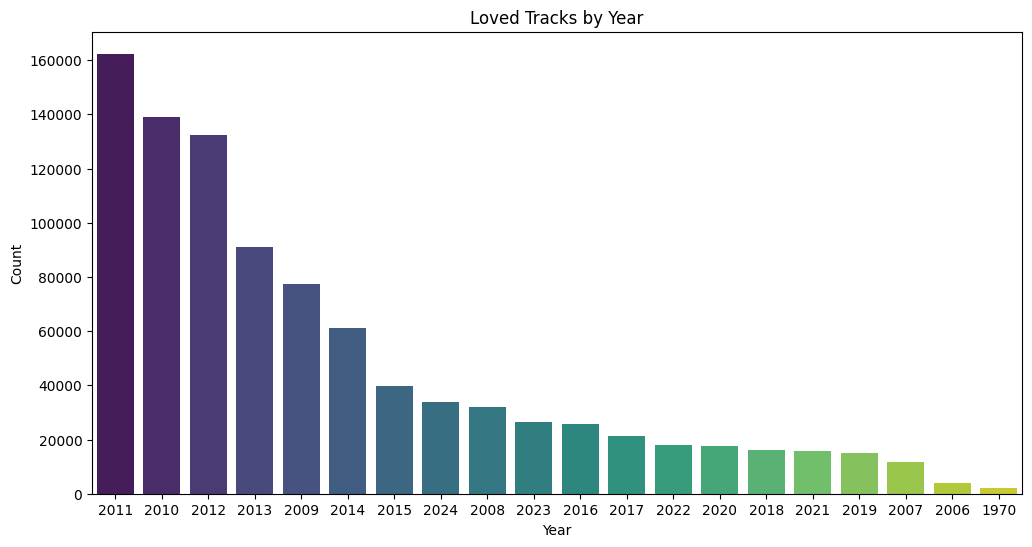

/var/folders/lf/n1zts8hd1tq86b0j1kdvgg200000gn/T/ipykernel_89863/2068819851.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y='loved_artist_name', data=top_expanded_tracks_artists, order=top_expanded_tracks_artists['loved_artist_name'].value_counts().index, palette='viridis')


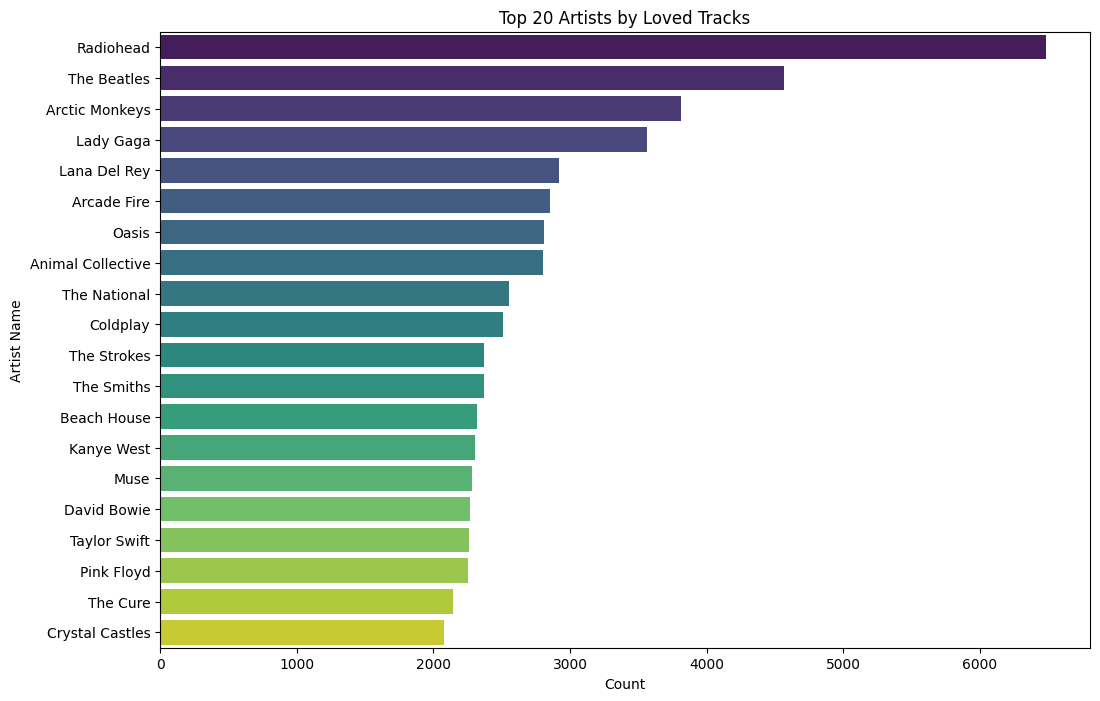

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns

# Count plot for loved tracks by year with color coding
plt.figure(figsize=(12, 6))
sns.countplot(x='year', data=expanded_tracks, order=expanded_tracks['year'].value_counts().index, palette='viridis')
plt.title('Loved Tracks by Year')
plt.xlabel('Year')
plt.ylabel('Count')
plt.show()

# Limit to top 20 artists
top_artists = expanded_tracks['loved_artist_name'].value_counts().head(20).index
top_expanded_tracks_artists = expanded_tracks[expanded_tracks['loved_artist_name'].isin(top_artists)]

# Count plot for loved songs by artist with color coding
plt.figure(figsize=(12, 8))
sns.countplot(y='loved_artist_name', data=top_expanded_tracks_artists, order=top_expanded_tracks_artists['loved_artist_name'].value_counts().index, palette='viridis')
plt.title('Top 20 Artists by Loved Tracks')
plt.xlabel('Count')
plt.ylabel('Artist Name')
plt.show()

/var/folders/lf/n1zts8hd1tq86b0j1kdvgg200000gn/T/ipykernel_89863/2973775944.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=top_tracks.index, x=top_tracks.values, palette='viridis')


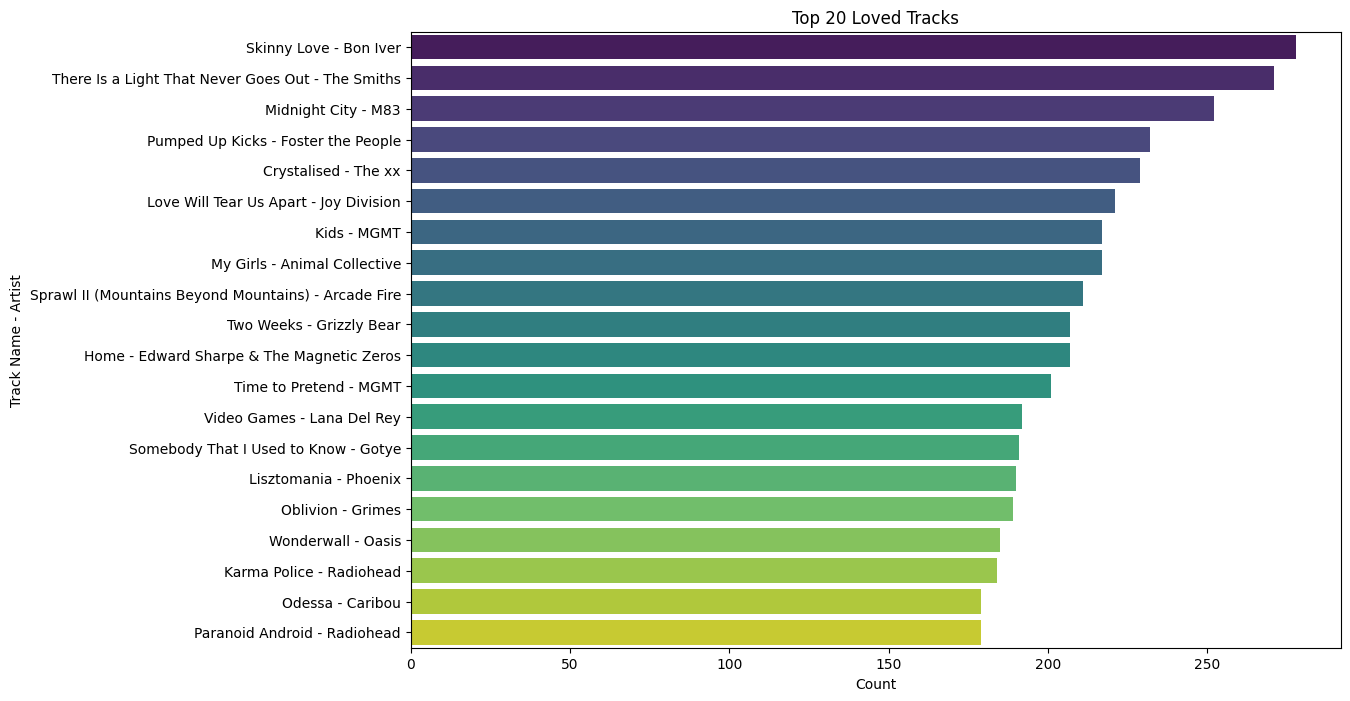

In [14]:
# Ensure loved_tracks is a list
df_user['loved_tracks'] = df_user['loved_tracks'].apply(lambda x: eval(str(x)) if isinstance(x, str) else x)

# Combine track name and artist name
df_user['loved_track_artist'] = df_user['loved_tracks'].apply(lambda x: [f"{track['track_name']} - {track['artist_name']}" for track in x])

# Extract all tracks with artist names
all_tracks = [track for sublist in df_user['loved_track_artist'] for track in sublist]

# Get the top 20 tracks
top_tracks = pd.Series(all_tracks).value_counts().head(20)

# Plot the top 20 tracks
plt.figure(figsize=(12, 8))
sns.barplot(y=top_tracks.index, x=top_tracks.values, palette='viridis')
plt.title('Top 20 Loved Tracks')
plt.xlabel('Count')
plt.ylabel('Track Name - Artist')
plt.show()

In [15]:
expanded_tracks['country'].unique()

array(['United Kingdom', 'France', 'United States', 'Switzerland',
       'Austria', 'Australia', 'Sweden', 'Canada', 'Germany', 'Italy',
       'Belgium', 'Uganda', 'Japan', 'Portugal', 'Brazil', 'Hungary',
       'French Polynesia', 'Spain', 'Netherlands', 'Finland', 'Greece',
       'Russian Federation', 'Norway', 'Colombia', 'Faroe Islands',
       'Serbia', 'Ireland', 'Tunisia', 'Romania', 'India', 'Argentina',
       'Venezuela', 'Chile', 'Mexico', 'Zimbabwe', 'New Zealand',
       'Kiribati', 'Indonesia', 'Turkey', 'Sudan', 'Ukraine',
       'United States Minor Outlying Islands', 'Philippines', 'Israel',
       'Antarctica', 'Korea, Republic of', 'Czech Republic', 'Estonia',
       'China', 'Croatia', 'Thailand', 'Poland', 'Bulgaria', 'Slovakia',
       'Peru', 'Latvia', 'Bangladesh', 'Macao', 'Cuba', 'Belarus',
       'Denmark', 'Tuvalu', 'Viet Nam', 'Malaysia', 'Kazakhstan',
       'South Africa', 'Lithuania', 'Virgin Islands, U.s.', 'San Marino',
       'Taiwan', 'Georgia', 

In [16]:
country_counts = expanded_tracks['country'].value_counts()
country_counts

country
United States          243884
Brazil                 111234
Australia              106349
United Kingdom          99813
Poland                  57801
                        ...  
Trinidad and Tobago        32
Iraq                       23
Ghana                      20
Marshall Islands            7
French Guiana               6
Name: count, Length: 143, dtype: int64

In [17]:
# Calculate the country value counts by percentages
country_counts_percent = (country_counts / country_counts.sum()) * 100
 
country_counts_percent

country
United States          25.871593
Brazil                 11.799875
Australia              11.281667
United Kingdom         10.588318
Poland                  6.131620
                         ...    
Trinidad and Tobago     0.003395
Iraq                    0.002440
Ghana                   0.002122
Marshall Islands        0.000743
French Guiana           0.000636
Name: count, Length: 143, dtype: float64

In [18]:
# Group countries with less than 5% into "Other"
less_than_5_percent = country_counts_percent[country_counts_percent < 5]
other_sum = less_than_5_percent.sum()

# Filter out countries with less than 5% and add the "Other" category
filtered_counts = country_counts_percent[country_counts_percent >= 5]
filtered_counts['Other'] = other_sum

In [19]:
expanded_tracks['country'].unique()

array(['United Kingdom', 'France', 'United States', 'Switzerland',
       'Austria', 'Australia', 'Sweden', 'Canada', 'Germany', 'Italy',
       'Belgium', 'Uganda', 'Japan', 'Portugal', 'Brazil', 'Hungary',
       'French Polynesia', 'Spain', 'Netherlands', 'Finland', 'Greece',
       'Russian Federation', 'Norway', 'Colombia', 'Faroe Islands',
       'Serbia', 'Ireland', 'Tunisia', 'Romania', 'India', 'Argentina',
       'Venezuela', 'Chile', 'Mexico', 'Zimbabwe', 'New Zealand',
       'Kiribati', 'Indonesia', 'Turkey', 'Sudan', 'Ukraine',
       'United States Minor Outlying Islands', 'Philippines', 'Israel',
       'Antarctica', 'Korea, Republic of', 'Czech Republic', 'Estonia',
       'China', 'Croatia', 'Thailand', 'Poland', 'Bulgaria', 'Slovakia',
       'Peru', 'Latvia', 'Bangladesh', 'Macao', 'Cuba', 'Belarus',
       'Denmark', 'Tuvalu', 'Viet Nam', 'Malaysia', 'Kazakhstan',
       'South Africa', 'Lithuania', 'Virgin Islands, U.s.', 'San Marino',
       'Taiwan', 'Georgia', 

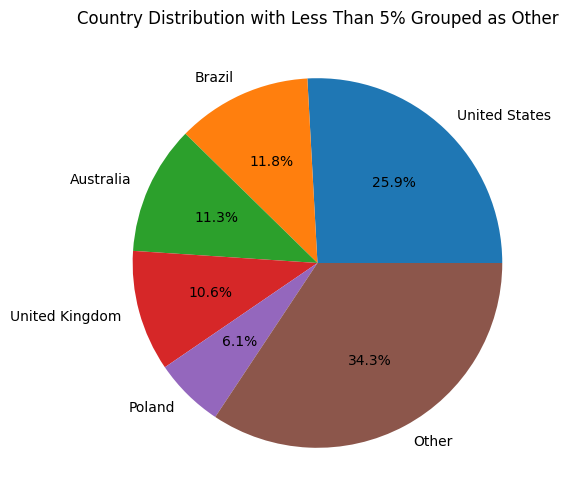

In [20]:
# Create the pie chart
plt.figure(figsize=(10, 6))
plt.pie(filtered_counts, labels=filtered_counts.index, autopct='%1.1f%%')
plt.title('Country Distribution with Less Than 5% Grouped as Other')
plt.show()

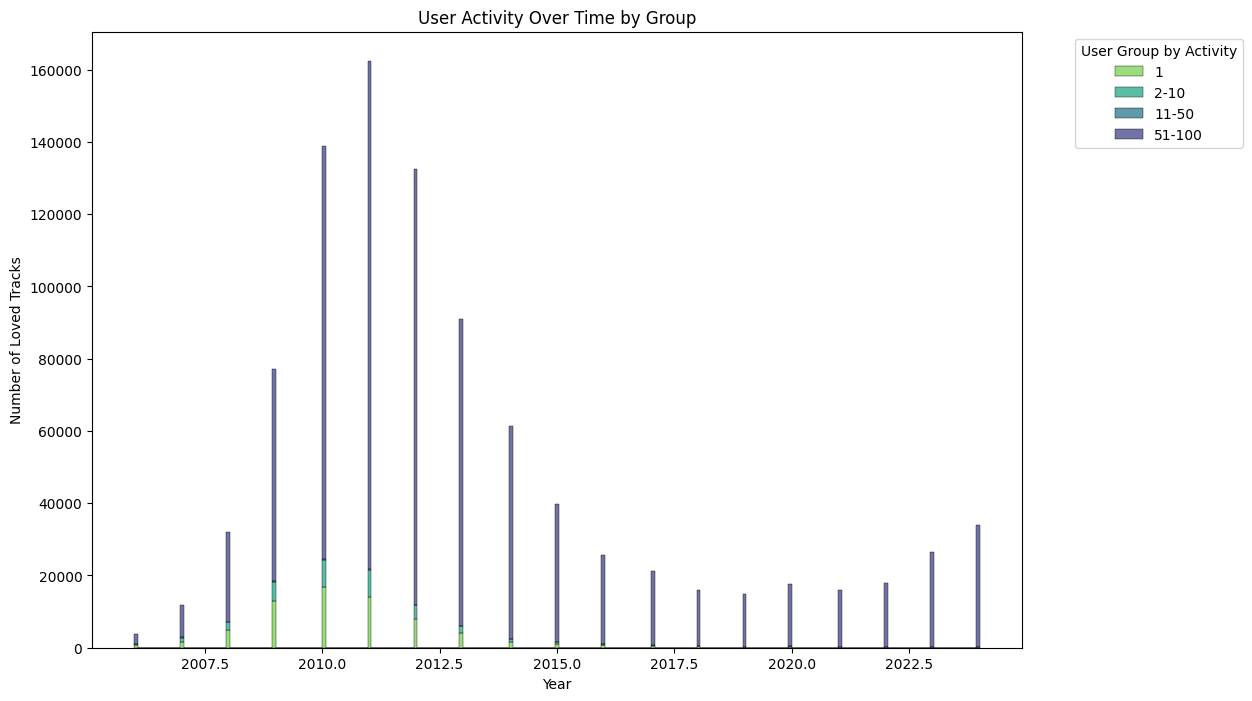

In [21]:
# Ensure loved_tracks is a list
df_user['loved_tracks'] = df_user['loved_tracks'].apply(lambda x: eval(str(x)) if isinstance(x, str) else x)

# Calculate the number of loved tracks
df_user['num_loved_tracks'] = df_user['loved_tracks'].apply(lambda x: len(x))

# Group users based on the number of loved tracks
bins = [0, 1, 10, 50, 100, float('inf')]
labels = ['1', '2-10', '11-50', '51-100', '100+']   # number of loved tracks
df_user['user_group'] = pd.cut(df_user['num_loved_tracks'], bins=bins, labels=labels, right=False)

# Prepare data for plotting
activity_data = []

for i, user in df_user.iterrows():
    for track in user['loved_tracks']:
        year = datetime.utcfromtimestamp(int(track['date_time']['uts'])).year
        if year < 1980:  # Exclude tracks from the 1970s
            continue
        activity_data.append({'user_group': user['user_group'], 'year': year})

activity_df = pd.DataFrame(activity_data)

# Plot User Activity Over Time by User Group
plt.figure(figsize=(12, 8))
sns.histplot(data=activity_df, x='year', hue='user_group', multiple='stack', palette='viridis')
plt.title('User Activity Over Time by Group')
plt.xlabel('Year')
plt.ylabel('Number of Loved Tracks')
plt.legend(title='User Group by Activity', labels=labels, bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

## EDA on Apple Music Dataset

In [22]:
expanded_tracks

,username,realname,country,user_id,loved_song_name,loved_artist_name,year
0,RJ,Richard Jones,United Kingdom,1,Fire,The Black Seeds,2016
0,RJ,Richard Jones,United Kingdom,1,Just Jammin',Gramatik,2016
0,RJ,Richard Jones,United Kingdom,1,Giddy Up,Tahuna Breaks,2015
0,RJ,Richard Jones,United Kingdom,1,The Nod,Fat Freddy's Drop,2015
0,RJ,Richard Jones,United Kingdom,1,Lady Day and John Coltrane,Gil Scott-Heron,2015
...,...,...,...,...,...,...,...
6828,LeoMetal965,Leonardo Marques,Brazil,6829,Cryin´,Aerosmith,2013
6828,LeoMetal965,Leonardo Marques,Brazil,6829,Agony,James LaBrie,2013
6828,LeoMetal965,Leonardo Marques,Brazil,6829,Maquina do tempo,Rosa de Saron,2013
6828,LeoMetal965,Leonardo Marques,Brazil,6829,Hanging by a Moment,Lifehouse,2013


In [23]:
expanded_tracks = expanded_tracks.rename(columns={'username':'username','loved_song_name':'Track Name','loved_artist_name':'Artist'})
expanded_tracks

,username,realname,country,user_id,Track Name,Artist,year
0,RJ,Richard Jones,United Kingdom,1,Fire,The Black Seeds,2016
0,RJ,Richard Jones,United Kingdom,1,Just Jammin',Gramatik,2016
0,RJ,Richard Jones,United Kingdom,1,Giddy Up,Tahuna Breaks,2015
0,RJ,Richard Jones,United Kingdom,1,The Nod,Fat Freddy's Drop,2015
0,RJ,Richard Jones,United Kingdom,1,Lady Day and John Coltrane,Gil Scott-Heron,2015
...,...,...,...,...,...,...,...
6828,LeoMetal965,Leonardo Marques,Brazil,6829,Cryin´,Aerosmith,2013
6828,LeoMetal965,Leonardo Marques,Brazil,6829,Agony,James LaBrie,2013
6828,LeoMetal965,Leonardo Marques,Brazil,6829,Maquina do tempo,Rosa de Saron,2013
6828,LeoMetal965,Leonardo Marques,Brazil,6829,Hanging by a Moment,Lifehouse,2013


In [24]:
df_items = pd.read_csv('data_collection/DATASET/apple_music_dataset.csv')
df_items.head(10)

,artistId,artistName,collectionCensoredName,collectionId,collectionName,collectionPrice,contentAdvisoryRating,country,currency,discCount,...,primaryGenreName,releaseDate,trackCensoredName,trackCount,trackExplicitness,trackId,trackName,trackNumber,trackPrice,trackTimeMillis
0,46087,Erick Sermon,Music,298321651,Music,9.99,Explicit,USA,USD,1,...,Hip-Hop/Rap,2001-08-27T12:00:00Z,Music (feat. Marvin Gaye),16,explicit,298321904,Music,4,1.29,223133
1,20044,Madonna,Music,80815197,Music,9.99,NaN,USA,USD,1,...,Pop,2000-08-21T07:00:00Z,Music,10,notExplicit,80815173,Music,1,1.29,225973
2,486597,Journey,Greatest Hits (2024 Remaster),169003304,Greatest Hits (2024 Remaster),10.99,NaN,USA,USD,1,...,Rock,1981-06-03T07:00:00Z,Don't Stop Believin' (2024 Remaster),16,notExplicit,169003415,Don't Stop Believin' (2024 Remaster),2,1.29,250835
3,156987,Jason Mraz,We Sing. We Dance. We Steal Things,277635758,We Sing. We Dance. We Steal Things,11.99,NaN,USA,USD,1,...,Pop,2008-02-12T08:00:00Z,I'm Yours,12,notExplicit,277635828,I'm Yours,2,1.29,242947
4,46087,Erick Sermon,Music,298429528,Music,9.99,Clean,USA,USD,1,...,Hip-Hop/Rap,2001-05-29T07:00:00Z,Music (feat. Marvin Gaye),16,cleaned,298429596,Music,4,1.29,223133
5,20044,Madonna,Celebration (Deluxe Video Edition),329064696,Celebration (Deluxe Video Edition),34.99,NaN,USA,USD,1,...,Pop,2009-09-29T07:00:00Z,Music,68,notExplicit,329064769,Music,59,1.99,286687
6,889327,Shakira,"Oral Fixation, Vol. 2 (Expanded Edition)",155658405,"Oral Fixation, Vol. 2 (Expanded Edition)",9.99,NaN,USA,USD,1,...,Pop,2006-02-28T08:00:00Z,Hips Don't Lie (feat. Wyclef Jean),13,notExplicit,155658510,Hips Don't Lie (feat. Wyclef Jean),3,1.29,218093
7,4488522,P!nk,The Truth About Love,545398133,The Truth About Love,10.99,NaN,USA,USD,1,...,Pop,2012-09-14T07:00:00Z,Just Give Me a Reason (feat. Nate Ruess),15,notExplicit,545398139,Just Give Me a Reason (feat. Nate Ruess),4,1.29,242721
8,138226712,Fun.,Some Nights,486040153,Some Nights,9.99,Explicit,USA,USD,1,...,Alternative,2012-02-21T08:00:00Z,Some Nights,11,explicit,486040194,Some Nights,2,1.29,277040
9,20044,Madonna,Celebration (Deluxe Version),329043011,Celebration (Deluxe Version) [Bonus Track],19.99,NaN,USA,USD,1,...,Pop,2000-08-21T07:00:00Z,Music,37,notExplicit,329043268,Music,2,1.29,225813


In [25]:
df_items = df_items.copy()
df_items = df_items[['artistName','country','primaryGenreName','trackName']]
df_items = df_items.rename(columns={'artistName':'Artist','country':'Country','primaryGenreName':'Tags','trackName':'Track Name'})
df_items.sample(10)

,Artist,Country,Tags,Track Name
6669,The Notorious B.I.G.,USA,Hip-Hop/Rap,Me and My Bitch (2005 Remaster)
4112,Imagine Dragons,USA,Alternative,Bad Liar
9143,Tamia,USA,R&B/Soul,Into You
3258,John Legend,USA,Soundtrack,Someday
7627,A Tribe Called Quest,USA,Hip-Hop/Rap,Bonita Applebum
9805,Rod Stewart,USA,Rock,My Heart Can't Tell You No
2207,Building 429,USA,Christian,Where I Belong
1909,Leighton Meester,USA,Soundtrack,Summer Girl
1132,Chris Young,USA,Country,Think of You (Duet with Cassadee Pope)
4075,Shinedown,USA,Hard Rock,Unity


In [26]:
# Frequency distribution of artists
print(df_items['Artist'].value_counts())

# Frequency distribution of track names
print(df_items['Track Name'].value_counts())

# Frequency distribution of tags
print(df_items['Tags'].value_counts())

# Frequency distribution of country
print(df_items['Country'].value_counts())

Artist
Taylor Swift                                       150
One Direction                                      130
Glee Cast                                          124
Michael Jackson                                    106
Kenny Chesney                                       92
                                                  ... 
Unk featuring OutKast & Jim Jones                    1
Simply Red                                           1
Luke Combs & Brooks & Dunn                           1
The Notorious B.I.G., Johnny Blaze & Method Man      1
David Eisley & Bob Kulick                            1
Name: count, Length: 1979, dtype: int64
Track Name
Music                             11
Heaven                             9
Home                               8
Already Gone                       7
My Life Would Suck Without You     7
                                  ..
Unbelievable (2007 Remaster)       1
It's a Laugh                       1
John Doe (feat. Priscilla)         1
Home

In [27]:
# Drop duplicates based on 'Artist' and 'Track Name' columns
df_items = df_items.drop_duplicates(subset=['Artist', 'Track Name'])

# Display the resulting DataFrame without duplicates
df_items.sample(10)

,Artist,Country,Tags,Track Name
5384,Sturgill Simpson,USA,Country,Just Let Go
4748,LINKIN PARK,USA,Hard Rock,SKIN TO BONE
2490,Foo Fighters,USA,Alternative,Something from Nothing
4065,Band of Skulls,USA,Soundtrack,Friends
6713,A$AP Rocky,USA,Hip-Hop/Rap,Peso
2269,Plies,USA,Hip-Hop/Rap,Shawty
3747,R. Kelly,USA,Soundtrack,Bump N' Grind
9105,Taylor Swift,USA,Pop,Forever Winter (Taylor's Version) [From The Va...
6642,Cute Is What We Aim For,USA,Alternative,There's a Class for This
4700,Michelle Branch,USA,Pop,All You Wanted


In [28]:
tag_counts = df_items['Tags'].value_counts()

# Calculate the country value counts by percentages
tag_counts_percent = (tag_counts / tag_counts.sum()) * 100
 
tag_counts_percent

Tags
Pop                    21.312074
Country                14.033593
Rock                   13.047712
Alternative            11.550633
Hip-Hop/Rap            10.248296
Soundtrack              6.669912
Hard Rock               5.464946
R&B/Soul                4.600779
Christian               1.837877
Dance                   1.582278
Singer/Songwriter       1.448393
Metal                   1.217137
Musicals                0.876339
Holiday                 0.803311
Christmas: Pop          0.742454
Electronic              0.693768
Classical               0.681597
Children's Music        0.450341
Rap                     0.328627
Música tropical         0.267770
Hip-Hop                 0.194742
Pop Latino              0.170399
Soft Rock               0.158228
Fitness & Workout       0.146056
Latin                   0.133885
Comedy                  0.133885
Reggae                  0.133885
Easy Listening          0.109542
Christmas: Classic      0.097371
Jazz                    0.085200
Chris

In [29]:
# Group countries with less than 5% into "Other"
less_than_5_percent = tag_counts_percent[tag_counts_percent < 5]
other_sum = less_than_5_percent.sum()

# Filter out countries with less than 5% and add the "Other" category
filtered_counts = tag_counts_percent[tag_counts_percent >= 5]
filtered_counts['Other'] = other_sum

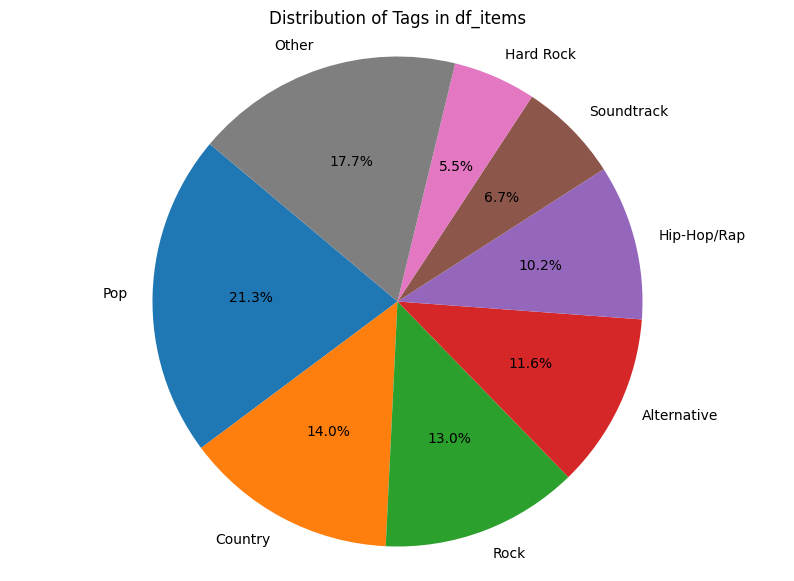

In [30]:
# Plot the pie chart
plt.figure(figsize=(10, 7))
plt.pie(filtered_counts, labels=filtered_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Tags in df_items')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()

## EDA on items.csv (filtered based on last fm loved tracks)

In [31]:
expanded_tracks

,username,realname,country,user_id,Track Name,Artist,year
0,RJ,Richard Jones,United Kingdom,1,Fire,The Black Seeds,2016
0,RJ,Richard Jones,United Kingdom,1,Just Jammin',Gramatik,2016
0,RJ,Richard Jones,United Kingdom,1,Giddy Up,Tahuna Breaks,2015
0,RJ,Richard Jones,United Kingdom,1,The Nod,Fat Freddy's Drop,2015
0,RJ,Richard Jones,United Kingdom,1,Lady Day and John Coltrane,Gil Scott-Heron,2015
...,...,...,...,...,...,...,...
6828,LeoMetal965,Leonardo Marques,Brazil,6829,Cryin´,Aerosmith,2013
6828,LeoMetal965,Leonardo Marques,Brazil,6829,Agony,James LaBrie,2013
6828,LeoMetal965,Leonardo Marques,Brazil,6829,Maquina do tempo,Rosa de Saron,2013
6828,LeoMetal965,Leonardo Marques,Brazil,6829,Hanging by a Moment,Lifehouse,2013


In [43]:
df_filtered_items = pd.read_csv('data_collection/apple_items.csv')

In [44]:
df_filtered_items.head()

,artistName,trackName,tags
0,Jason Mraz,I'm Yours,acoustic
1,Shakira,Hips Don't Lie (feat. Wyclef Jean),pop
2,P!nk,Just Give Me a Reason (feat. Nate Ruess),pop
3,Fun.,Some Nights,indie
4,Foster the People,Pumped Up Kicks,indie


In [45]:
df_filtered_items = df_filtered_items.rename(columns={'artistName': 'Artist', 'trackName': 'Track Name', 'tags': 'Tags'})
df_filtered_items

,Artist,Track Name,Tags
0,Jason Mraz,I'm Yours,acoustic
1,Shakira,Hips Don't Lie (feat. Wyclef Jean),pop
2,P!nk,Just Give Me a Reason (feat. Nate Ruess),pop
3,Fun.,Some Nights,indie
4,Foster the People,Pumped Up Kicks,indie
...,...,...,...
6783,Madonna,The Power of Good-Bye,pop
6784,Korn,Y'all Want a Single,Nu Metal
6785,Slipknot,Goodbye,Nu Metal
6786,Red,Faceless,alternative rock


In [46]:
# Frequency distribution of artists
print(df_filtered_items['Artist'].value_counts())

# Frequency distribution of track names
print(df_filtered_items['Track Name'].value_counts())

# Frequency distribution of tags
print(df_filtered_items['Tags'].value_counts())

Artist
Taylor Swift           117
Glee Cast              103
One Direction           86
Carrie Underwood        75
Kenny Chesney           67
                      ... 
N.W.A                    1
5 Seconds of Summer      1
The Weepies              1
Khia                     1
Andrew Belle             1
Name: count, Length: 1505, dtype: int64
Track Name
Heaven                                      7
Home                                        6
Someday                                     6
Breathe                                     5
Alive                                       5
                                           ..
Soap                                        1
Baby, What a Big Surprise                   1
Jingle Bells (feat. The Puppini Sisters)    1
Un-Break My Heart                           1
Heartbreaker (2005 Remaster)                1
Name: count, Length: 6410, dtype: int64
Tags
pop                       860
country                   799
rock                      583
Hip-

In [47]:
# Find matching songs between the user loved tracks and df_filtered_items:
matching_songs = pd.merge(expanded_tracks, df_filtered_items, on=['Artist', 'Track Name'], how='inner')

# Display matching songs
print(matching_songs)

          username          realname         country  user_id  \
0               RJ    Richard Jones   United Kingdom        1   
1               RJ    Richard Jones   United Kingdom        1   
2               RJ    Richard Jones   United Kingdom        1   
3               RJ    Richard Jones   United Kingdom        1   
4               RJ    Richard Jones   United Kingdom        1   
...            ...               ...             ...      ...   
43677  LeoMetal965  Leonardo Marques          Brazil     6829   
43678  LeoMetal965  Leonardo Marques          Brazil     6829   
43679  LeoMetal965  Leonardo Marques          Brazil     6829   
43680  LeoMetal965  Leonardo Marques          Brazil     6829   
43681  LeoMetal965  Leonardo Marques          Brazil     6829   

                 Track Name                Artist  year               Tags  
0                 Hypnotize  The Notorious B.I.G.  2014                rap  
1                Pickup Man            Joe Diffie  2014          

In [48]:
# Compare apple music dataset artists and every user's loved artists 
matching_artists = df_filtered_items['Artist'].isin(expanded_tracks['Artist']).value_counts()
matching_artists

Artist
True     6108
False     680
Name: count, dtype: int64

In [49]:
# Calculate the artist value counts by percentages
matching_artists_percent = (matching_artists / matching_artists.sum()) * 100
 
matching_artists_percent

Artist
True     89.982322
False    10.017678
Name: count, dtype: float64

In [50]:
# Compare apple music dataset songs and every user's loved songs 
matching_songs = pd.merge(expanded_tracks, df_filtered_items, on=['Artist', 'Track Name'], how='inner')

# Print only the matching songs (track name and artist name)
matching_songs[['Track Name', 'Artist']].value_counts()

Track Name                              Artist                      
Skinny Love                             Bon Iver                        278
There Is a Light That Never Goes Out    The Smiths                      271
Midnight City                           M83                             252
Pumped Up Kicks                         Foster the People               232
Kids                                    MGMT                            217
                                                                       ... 
Heart Skips a Beat (feat. Chiddy Bang)  Olly Murs                         1
This Means War                          Nickelback                        1
Mad World                               Michael Andrews & Gary Jules      1
He Loves U Not                          Dream                             1
Open Wide (feat. Big Sean)              Calvin Harris                     1
Name: count, Length: 3703, dtype: int64

In [51]:
# Count the number of matching songs
num_matching_songs = len(matching_songs)

# Find the number of non-matching songs
non_matching_songs = expanded_tracks.merge(df_filtered_items, on=['Artist', 'Track Name'], how='left', indicator=True)
num_non_matching_songs = non_matching_songs[non_matching_songs['_merge'] == 'left_only'].shape[0]

# Print results
print(f"Number of matching songs: {num_matching_songs}")
print(f"Number of non-matching songs: {num_non_matching_songs}")

Number of matching songs: 43682
Number of non-matching songs: 898989


In [52]:
print("Matching songs:")
print(matching_songs[['Track Name', 'Artist']])

print("Non-matching songs:")
print(non_matching_songs[non_matching_songs['_merge'] == 'left_only'][['Track Name', 'Artist']])

Matching songs:
                 Track Name                Artist
0                 Hypnotize  The Notorious B.I.G.
1                Pickup Man            Joe Diffie
2      Rain Is a Good Thing            Luke Bryan
3                 Centipede           Knife Party
4           I Kissed a Girl            Katy Perry
...                     ...                   ...
43677    People Are Strange             The Doors
43678              My Curse     Killswitch Engage
43679   Take My Breath Away                Berlin
43680           Crimson Day     Avenged Sevenfold
43681         Absolute Zero            Stone Sour

[43682 rows x 2 columns]
Non-matching songs:
                        Track Name             Artist
0                             Fire    The Black Seeds
1                     Just Jammin'           Gramatik
2                         Giddy Up      Tahuna Breaks
3                          The Nod  Fat Freddy's Drop
4       Lady Day and John Coltrane    Gil Scott-Heron
...           

In [53]:
df_filtered_items = pd.read_csv('data_collection/apple_items.csv')
df_filtered_items

,artistName,trackName,tags
0,Jason Mraz,I'm Yours,acoustic
1,Shakira,Hips Don't Lie (feat. Wyclef Jean),pop
2,P!nk,Just Give Me a Reason (feat. Nate Ruess),pop
3,Fun.,Some Nights,indie
4,Foster the People,Pumped Up Kicks,indie
...,...,...,...
6783,Madonna,The Power of Good-Bye,pop
6784,Korn,Y'all Want a Single,Nu Metal
6785,Slipknot,Goodbye,Nu Metal
6786,Red,Faceless,alternative rock


## EDA on apple_interactions.csv

In [57]:
df_interactions = pd.read_csv('data_collection/apple_interactions.csv')
df_interactions = df_interactions.rename(columns={'track_name':'Track Name'})
df_interactions

,username,Track Name,date_time
0,RJ,Hypnotize,1412295881
1,RJ,I Kissed a Girl,1393609579
2,RJ,Toxic,1393608840
3,RJ,I Wish,1393601271
4,RJ,Butterfly,1382626421
...,...,...,...
31036,LeoMetal965,Africa,1439132982
31037,LeoMetal965,Belief,1396883356
31038,LeoMetal965,People Are Strange,1384100431
31039,LeoMetal965,My Curse,1380844015


In [59]:
# Frequency distribution of artists
print(df_interactions['username'].value_counts())

# Frequency distribution of track names
print(df_interactions['Track Name'].value_counts())

# Frequency distribution of tags
print(df_interactions['date_time'].value_counts())

username
rony_sp           50
juan_melo         46
everdeeen         46
AmeliePoulain7    44
Its_bitch         44
                  ..
primalstatik       5
carlohilton        5
sadeyedprophet     5
cabeshpash         5
tedbassman         5
Name: count, Length: 2825, dtype: int64
Track Name
Skinny Love                             246
There Is a Light That Never Goes Out    208
Pumped Up Kicks                         195
Midnight City                           187
Kids                                    178
                                       ... 
You should be sad                         5
Rose Tattoo                               5
Lonely No More                            5
Be Here Now                               5
Let It Die                                5
Name: count, Length: 1519, dtype: int64
date_time
0             23
1675167679     4
1429816436     3
1289581328     3
1341766461     2
              ..
1255311149     1
1255374589     1
1255376405     1
1255376424     1
13800

100%|██████████| 2807/2807 [00:00<00:00, 103674.78it/s]


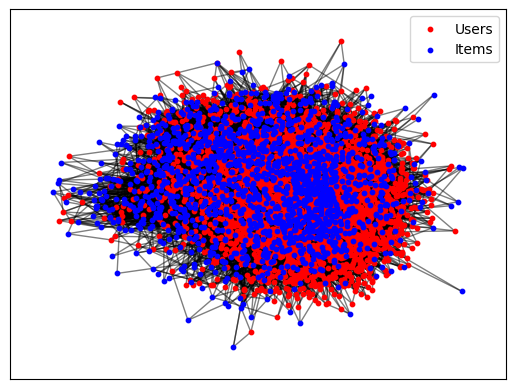

In [12]:
from apple_datareader import df_interactions_processed, df_items_processed, user_data, item_data, sorted_reindexed_interactions_by_key
from structs import MusicInteractionGraph
import networkx as nx
import matplotlib.pyplot as plt 


'''
    Plot the Apple Data
'''
# Initialize the MusicInteractionGraph with the loaded data
apple_graph = MusicInteractionGraph(user_data, item_data, sorted_reindexed_interactions_by_key, warm_threshold=0.2)

# Create a NetworkX graph
def plot_bipartite_graph(graph):
    B = nx.Graph()
    
    # Add nodes with the node attribute "bipartite"
    B.add_nodes_from(range(len(graph.user_data)), bipartite=0)  # Users
    B.add_nodes_from(range(len(graph.user_data), len(graph.user_data) + len(graph.item_data)), bipartite=1)  # Items

    # Add edges between users and items
    for edge in graph.train_edges:
        B.add_edge(edge[0], edge[1])
    
    # Draw the bipartite graph with different colors for users and items
    pos = nx.spring_layout(B)
    user_nodes = range(len(graph.user_data))
    item_nodes = range(len(graph.user_data), len(graph.user_data) + len(graph.item_data))
    nx.draw_networkx_nodes(B, pos, nodelist=user_nodes, node_color='r', node_size=10, label='Users')
    nx.draw_networkx_nodes(B, pos, nodelist=item_nodes, node_color='b', node_size=10, label='Items')
    nx.draw_networkx_edges(B, pos, edgelist=B.edges(), alpha=0.5)
    plt.legend(scatterpoints=1)
    plt.show()

# Plot the bipartite graph
plot_bipartite_graph(apple_graph)

100%|██████████| 659/659 [00:00<00:00, 260464.22it/s]


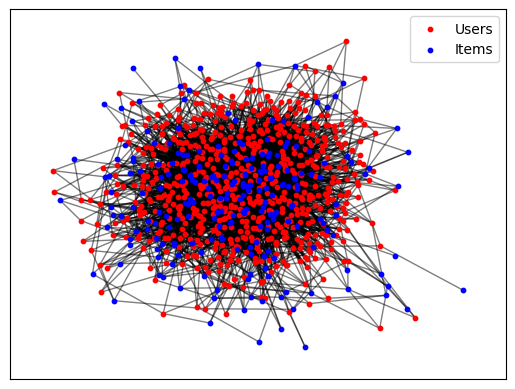

In [13]:
from spotify_data_reader import df_interactions_processed, df_items_processed, user_data, item_data, sorted_reindexed_interactions_by_key

# Initialize the MusicInteractionGraph with the small batch of data
spotify_graph = MusicInteractionGraph(user_data, item_data, sorted_reindexed_interactions_by_key, warm_threshold=0.2)
# Plot the bipartite graph
plot_bipartite_graph(spotify_graph)

Sample interaction data:
[[   0 3858]
 [   0 3973]
 [   0 3996]
 [   0 4089]
 [   0 3720]
 [   0 3294]
 [   1 3848]
 [   1 4075]
 [   1 4036]
 [   1 4150]]
Sample user data:
[(0, {'username': 770, 'country': 92}), (403, {'username': 1538, 'country': 92}), (789, {'username': 1416, 'country': 92}), (2242, {'username': 1783, 'country': 92}), (1, {'username': 709, 'country': 93}), (52, {'username': 2440, 'country': 92}), (92, {'username': 287, 'country': 30}), (178, {'username': 1408, 'country': 92}), (254, {'username': 2140, 'country': 93}), (299, {'username': 1818, 'country': 92})]
Sample item data:
[(3368, {'Track Name': array([-1.11070715e-01, -2.81960377e-03,  2.53713895e-02, -4.41995449e-02,
        1.08256526e-01,  3.48829217e-02,  1.15278423e-01, -1.26783093e-02,
        4.02960107e-02, -3.90305705e-02, -1.09627113e-01, -3.02679166e-02,
       -6.33101463e-02,  5.22919139e-03, -1.28977392e-02,  1.66054012e-03,
        7.98697770e-02,  7.62261525e-02, -2.43739830e-03,  3.11207548e-0

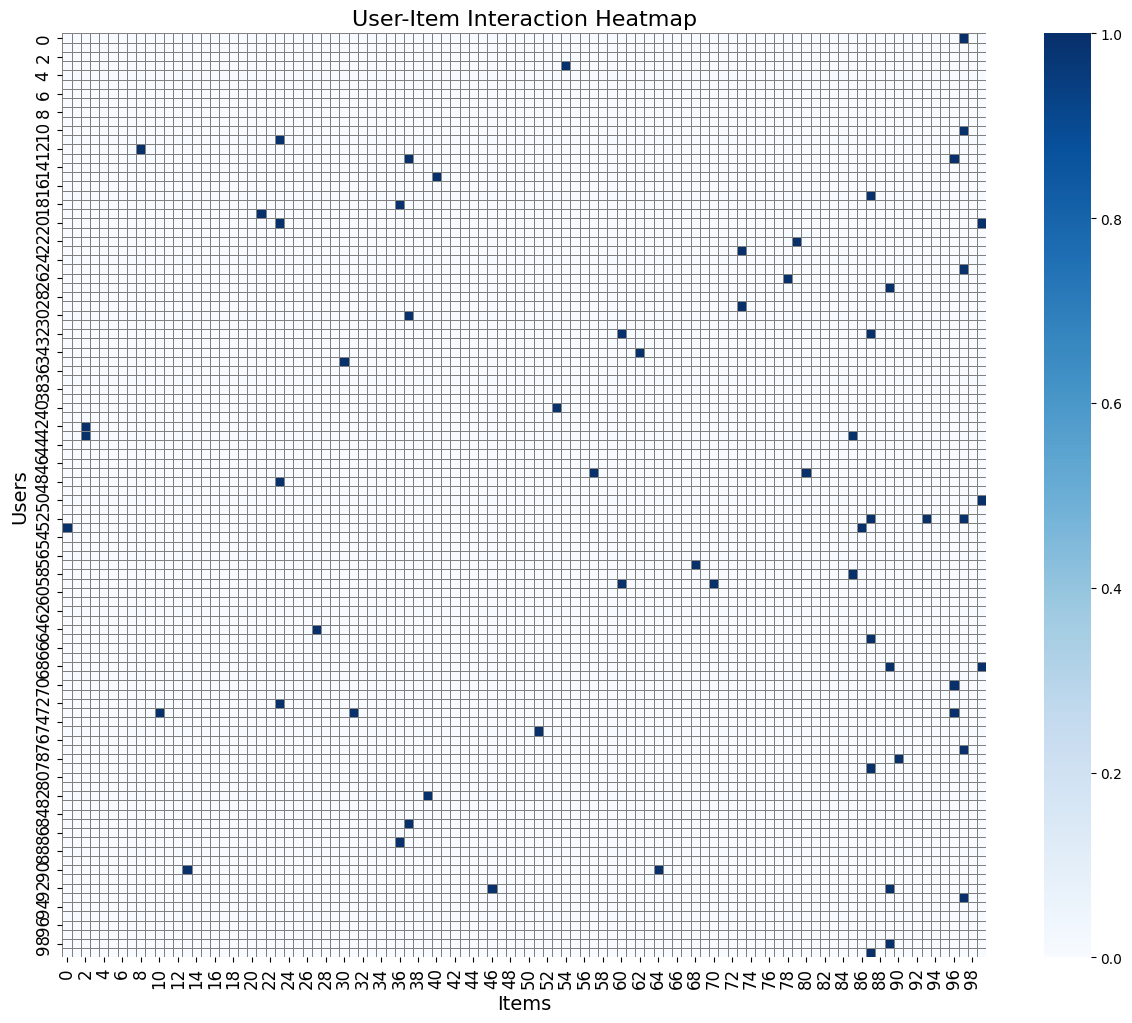

In [26]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import random

# Print a sample of the interaction data
print("Sample interaction data:")
print(apple_graph.train_edges[:10])

# Print a sample of user data
print("Sample user data:")
print(list(apple_graph.user_data.items())[:10])

# Print a sample of item data
print("Sample item data:")
print(list(apple_graph.item_data.items())[:10])

def plot_adjacency_matrix(graph, max_users=50, max_items=50):
    interactions = np.array(graph.train_edges)
    user_ids = interactions[:, 0]
    item_ids = interactions[:, 1] - len(graph.user_data)
    
    # Get unique user and item IDs
    unique_user_ids = np.unique(user_ids)
    unique_item_ids = np.unique(item_ids)
    
    # Shuffle and select a random batch of users and items
    np.random.shuffle(unique_user_ids)
    np.random.shuffle(unique_item_ids)
    
    unique_user_ids = unique_user_ids[:max_users]
    unique_item_ids = unique_item_ids[:max_items]
    
    # Create a mapping of original IDs to filtered indices
    user_id_map = {user_id: idx for idx, user_id in enumerate(unique_user_ids)}
    item_id_map = {item_id: idx for idx, item_id in enumerate(unique_item_ids)}
    
    # Initialize adjacency matrix
    adj_matrix = np.zeros((len(unique_user_ids), len(unique_item_ids)))
    
    # Populate adjacency matrix
    for edge in graph.train_edges:
        user_id = edge[0]
        item_id = edge[1] - len(graph.user_data)
        if user_id in user_id_map and item_id in item_id_map:
            adj_matrix[user_id_map[user_id], item_id_map[item_id]] = 1
    
    plt.figure(figsize=(15, 12))
    sns.heatmap(adj_matrix, cmap='Blues', cbar=True, square=True, linewidths=0.5, linecolor='gray')
    plt.xlabel('Items', fontsize=14)
    plt.ylabel('Users', fontsize=14)
    plt.title('User-Item Interaction Heatmap', fontsize=16)
    plt.xticks(fontsize=12, rotation=90)
    plt.yticks(fontsize=12)
    plt.show()

# Assume `apple_graph` is the graph to be visualized
plot_adjacency_matrix(apple_graph, 100, 100)

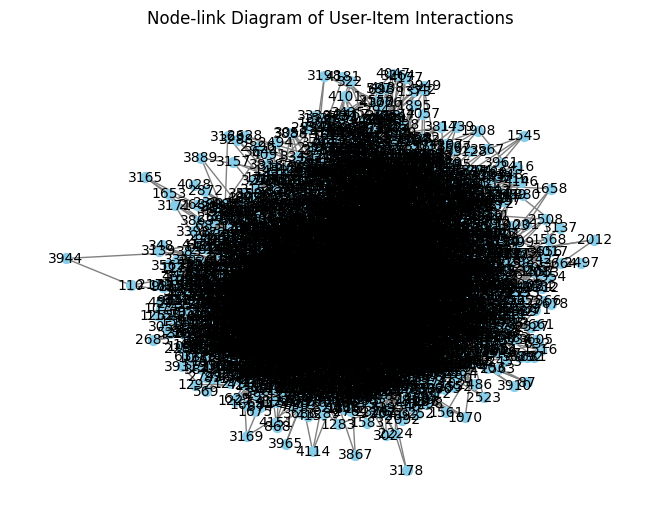

In [15]:
def plot_interaction_histogram(graph):
    user_interactions = [len(graph.interaction_data[user_id]) for user_id in graph.interaction_data]
    item_interactions = graph.item_degrees

    plt.figure(figsize=(12, 5))

    plt.subplot(1, 2, 1)
    plt.hist(user_interactions, bins=20, color='skyblue')
    plt.xlabel('Number of Interactions')
    plt.ylabel('Number of Users')
    plt.title('Distribution of Interactions per User')

    plt.subplot(1, 2, 2)
    plt.hist(item_interactions, bins=20, color='skyblue')
    plt.xlabel('Number of Interactions')
    plt.ylabel('Number of Items')
    plt.title('Distribution of Interactions per Item')

    plt.tight_layout()
    plt.show()

plot_interaction_histogram(small_graph)